## Different thicknesses of Aluminium and Silicon with fixed electron spectrum beam

In [1]:
import numpy as np
from matplotlib import pylab as plt
import uproot
from celluloid import Camera
import itertools as it

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
filenames_e=[
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-020_040_060_080_peakum-down-Aluminium-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-100_120_140_160_peakum-down-Aluminium-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-180_200_250_300_peakum-down-Aluminium-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-020_040_060_080_peakum-down-Silicon-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-100_120_140_160_peakum-down-Silicon-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-180_200_250_300_peakum-down-Silicon-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_020_030_040_peakum-down-Copper-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-050_060_070_080_peakum-down-Copper-Edep.root"    
#             "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Epi-100_120_140_160_peakum-down-Aluminium-901-Edep.root"    
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials_InputPhS/Total-000_008_012_004_peakum-Copper-10x10-250files-Edep.root"    
] 


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()
    print("1",data_frame_dict[files])
    print("2",data_frame_dict[files][0].shape)
    print("3",data_frame_dict[files][0][0].shape)

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials_InputPhS/Total-000_008_012_004_peakum-Copper-10x10-250files-Edep.root   

1 (array([[3.5256667, 3.4027638, 3.6487134, ..., 3.2847333, 3.1646347,
        3.898464 ],
       [3.4780474, 3.437044 , 2.922182 , ..., 3.538283 , 2.976939 ,
        3.6055832],
       [3.2515328, 3.6477368, 3.7931545, ..., 3.3276398, 3.3308568,
        3.2638862],
       ...,
       [3.3197315, 3.0896504, 3.7567744, ..., 3.6898794, 3.2662766,
        3.4392962],
       [3.4788878, 3.500057 , 3.5641437, ..., 2.7592003, 3.3141415,
        3.0490465],
       [3.3428428, 3.3579748, 3.2903147, ..., 3.3424034, 3.7217686,
        3.2442043]], dtype=float32), [(array([-25.  , -24.95, -24.9 , ...,  24.9 ,  24.95,  25.  ]), array([-25.  , -24.95, -24.9 , ...,  24.9 ,  24.95,  25.  ]))])
2 (1000, 1000)
3 (1000,)


Total-000_008_012_004_peakum-Copper-10x10-250files-Edep.root
0 8 12 4


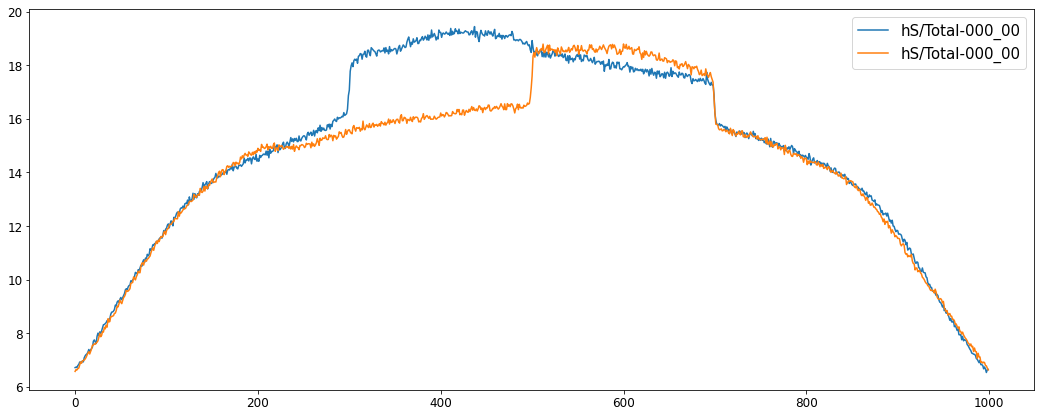

In [16]:
plt.subplots(1,1,figsize=(18,7))
e_min=np.array([])
thick=np.array([])
e_min_al=np.array([])
thick_al=np.array([])
e_min_cu=np.array([])
thick_cu=np.array([])
zero=data_frame_dict[filenames_e[0]][0][:,300:700].mean(axis=1)[250:260].mean()

# zero=data_frame_dict[filenames_e[0]][0][:,270:370].mean(axis=1)[50:150].mean()
# e_min=np.append(e_min,zero)
# thick=np.append(thick,0)
# e_min_al=np.append(e_min_al,zero)
# thick_al=np.append(thick_al,0)
# e_min_cu=np.append(e_min_cu,zero)
# thick_cu=np.append(thick_cu,0)


for files in filenames_e:
    if ("Silicon" in files or "Aluminium" in files):
        lstyle="-"
    else:
        lstyle="-"
        
    crop_filename=files.split("/")[5]
    print(crop_filename)
    label1=int(crop_filename[6:9])
    label2=int(crop_filename[10:13])
    label3=int(crop_filename[14:17])
    label4=int(crop_filename[18:21])
    print(label1,label2,label3,label4)
    
    
    dic=data_frame_dict[files][0][380:420,:].mean(axis=0)
    dic2=data_frame_dict[files][0][580:620,:].mean(axis=0)
#     dic=dic.reshape(int(len(dic)/6),6).mean(axis=1)
    histe=plt.plot(dic,label=files[51:66],linestyle=lstyle)
    histe=plt.plot(dic2,label=files[51:66],linestyle=lstyle)


    if "Silicon" in files:
    
    #skipping because I messed up the sim on this
    
    #     e_min=np.append(e_min,dic[380:420].mean())
    #     thick=np.append(thick,int(files[59:62]))

    #     e_min=np.append(e_min,dic[580:620].mean())
    #     thick=np.append(thick,int(files[63:66]))

        e_min=np.append(e_min,dic2[380:420].mean())

        thick=np.append(thick,int(files[51:54]))
        e_min=np.append(e_min,dic2[580:620].mean())
        thick=np.append(thick,int(files[55:58]))
    elif "Copper" in files:
        
        e_min_cu=np.append(e_min_cu,dic[380:420].mean())
        thick_cu=np.append(thick_cu,label3)

        e_min_cu=np.append(e_min_cu,dic[580:620].mean())
        thick_cu=np.append(thick_cu,label4)
        
        e_min_cu=np.append(e_min_cu,dic2[380:420].mean())
        thick_cu=np.append(thick_cu,label1)

        e_min_cu=np.append(e_min_cu,dic2[580:620].mean())
        thick_cu=np.append(thick_cu,label2)
        
    else:
        
    #skipping because I messed up the sim on this
        
    
    #     e_min_al=np.append(e_min_al,dic[380:420].mean())
    #     thick_al=np.append(thick_al,int(files[59:62]))

    #     e_min_al=np.append(e_min_al,dic[580:620].mean())
    #     thick_al=np.append(thick_al,int(files[63:66]))

        e_min_al=np.append(e_min_al,dic2[380:420].mean())
        thick_al=np.append(thick_al,int(files[51:54]))

        e_min_al=np.append(e_min_al,dic2[580:620].mean())
        thick_al=np.append(thick_al,int(files[55:58]))
#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

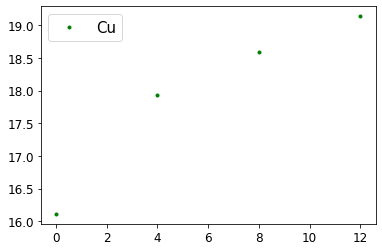

[] []


In [17]:
# plt.plot(thick_al,e_min_al,"r.",label="Al")
# plt.plot(thick,e_min,"b.",label="Si")
plt.plot(thick_cu,e_min_cu,"g.",label="Cu")
plt.legend()
plt.show()
print(thick_al,e_min_al)

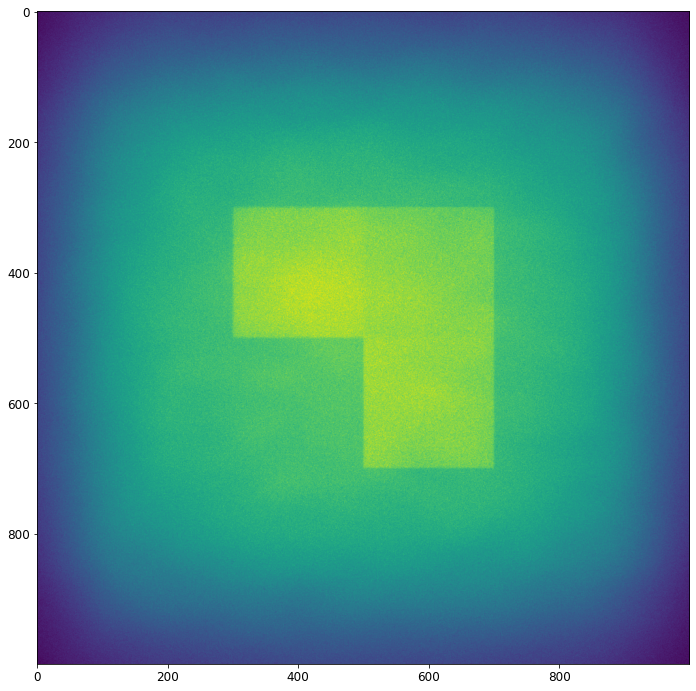

In [20]:


for files in filenames_e:
    plt.subplots(1,1,figsize=(12,12))

    dic=data_frame_dict[files][0]
    _=plt.imshow(dic)
    plt.show()

In [7]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-004_008_012_016_peakum-down-Copper-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-140_160_250_300_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-140_160_250_300_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-350_400_450_700_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-350_400_450_700_peakum-down-Silicon-Edep.root"
] 


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-004_008_012_016_peakum-down-Copper-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-010_030_060_080_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-140_160_250_300_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-140_160_250_300_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-350_400_450_700_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Elec_Materials/Total-350_400_450_700_peakum-down-Silicon-Edep.root   



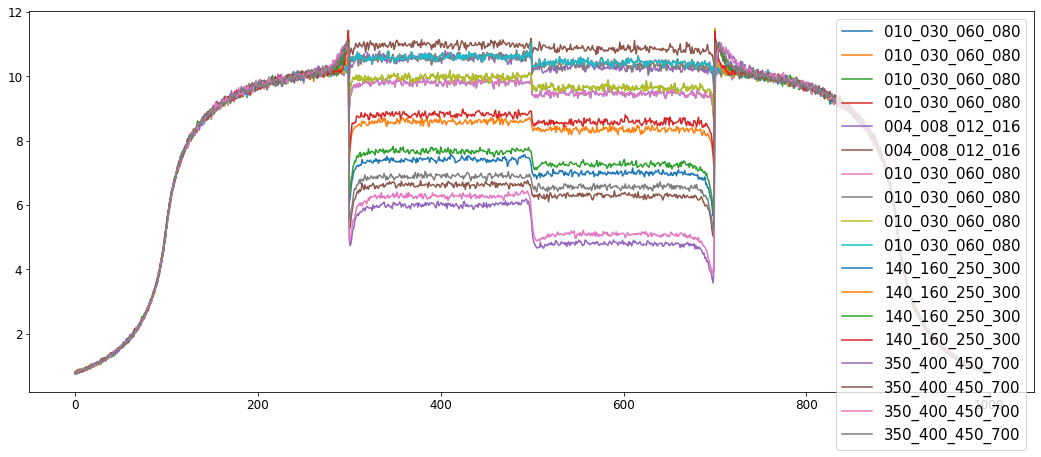

In [8]:
plt.subplots(1,1,figsize=(18,7))
# e_min=np.array([])
# thick=np.array([])
# e_min_al=np.array([])
# thick_al=np.array([])
# e_min_cu=np.array([])
# thick_cu=np.array([])
# zero=data_frame_dict[filenames_e[0]][0][:,300:700].mean(axis=1)[250:260].mean()

# # zero=data_frame_dict[filenames_e[0]][0][:,270:370].mean(axis=1)[50:150].mean()
# e_min=np.append(e_min,zero)
# thick=np.append(thick,0)
# e_min_al=np.append(e_min_al,zero)
# thick_al=np.append(thick_al,0)
# e_min_cu=np.append(e_min_cu,zero)
# thick_cu=np.append(thick_cu,0)

for files in filenames_e:
    if "Silicon" in files:
        lstyle="-"
    else:
        lstyle="-"
    dic=data_frame_dict[files][0][380:420,:].mean(axis=0)
    dic2=data_frame_dict[files][0][580:620,:].mean(axis=0)
#     dic=dic.reshape(int(len(dic)/6),6).mean(axis=1)
    histe=plt.plot(dic,label=files[51:66],linestyle=lstyle)
    histe=plt.plot(dic2,label=files[51:66],linestyle=lstyle)
    
    if "Silicon" in files:
    
    #skipping because I messed up the sim on this
    
        e_min=np.append(e_min,dic[380:420].mean())
        thick=np.append(thick,int(files[59:62]))

        e_min=np.append(e_min,dic[580:620].mean())
        thick=np.append(thick,int(files[63:66]))

        e_min=np.append(e_min,dic2[380:420].mean())
        thick=np.append(thick,int(files[51:54]))

        e_min=np.append(e_min,dic2[580:620].mean())
        thick=np.append(thick,int(files[55:58]))
    elif "Copper" in files:
        
        e_min_cu=np.append(e_min_cu,dic[380:420].mean())
        thick_cu=np.append(thick_cu,int(files[59:62]))

        e_min_cu=np.append(e_min_cu,dic[580:620].mean())
        thick_cu=np.append(thick_cu,int(files[63:66]))
        
        e_min_cu=np.append(e_min_cu,dic2[380:420].mean())
        thick_cu=np.append(thick_cu,int(files[51:54]))

        e_min_cu=np.append(e_min_cu,dic2[580:620].mean())
        thick_cu=np.append(thick_cu,int(files[55:58]))
        
    else:
        
    #skipping because I messed up the sim on this
        
    
        e_min_al=np.append(e_min_al,dic[380:420].mean())
        thick_al=np.append(thick_al,int(files[59:62]))

        e_min_al=np.append(e_min_al,dic[580:620].mean())
        thick_al=np.append(thick_al,int(files[63:66]))

        e_min_al=np.append(e_min_al,dic2[380:420].mean())
        thick_al=np.append(thick_al,int(files[51:54]))

        e_min_al=np.append(e_min_al,dic2[580:620].mean())
        thick_al=np.append(thick_al,int(files[55:58]))
#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [9]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-020_040_060_080_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-100_120_140_160_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-180_200_250_300_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-020_040_060_080_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-100_120_140_160_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-180_200_250_300_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-010_020_030_040_peakum-down-Copper-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-050_060_070_080_peakum-down-Copper-Edep.root",\
#             "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials_x200xsec/Total-010_030_250_300_peakum-down-Silicon-329files-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-010_030_250_300_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-350_400_450_700_peakum-down-Aluminium-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-010_030_250_300_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-350_400_450_700_peakum-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-004_008_012_016_peakum-down-Copper-Edep.root"
] 


data_frame_dict={}
for files in filenames_g:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-020_040_060_080_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-100_120_140_160_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-180_200_250_300_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-020_040_060_080_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-100_120_140_160_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-180_200_250_300_peakum-down-Silicon-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-010_020_030_040_peakum-down-Copper-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-050_060_070_080_peakum-down-Copper-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-010_030_250_300_peakum-down-Aluminium-Edep.root   

/work/lb8075/PhaseSpaces/PhS3_Gamma_Materials/Total-350_400_450_700_peakum-d

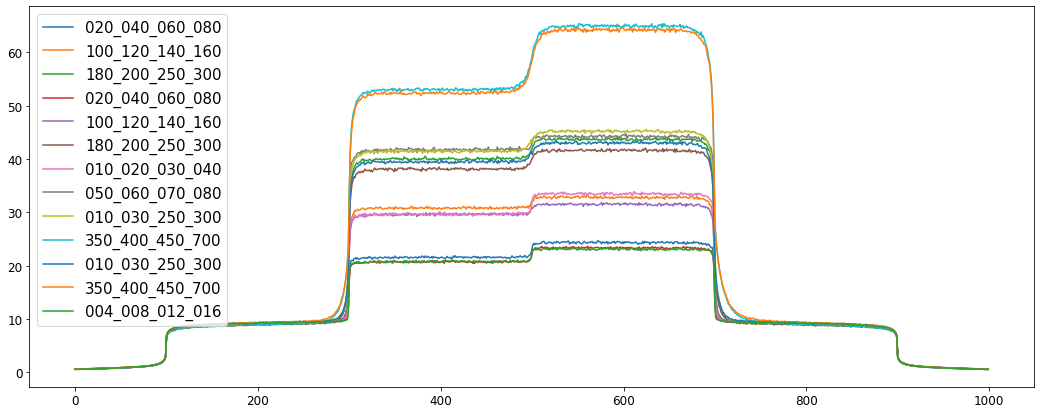

In [10]:
plt.subplots(1,1,figsize=(18,7))
e_min_gamma=np.array([])
thick_gamma=np.array([])
e_min_gamma_al=np.array([])
thick_gamma_al=np.array([])
e_min_gamma_cu=np.array([])
thick_gamma_cu=np.array([])
zero=data_frame_dict[filenames_g[0]][0][:,300:700].mean(axis=1)[250:260].mean()

# zero=data_frame_dict[filenames_e[0]][0][:,270:370].mean(axis=1)[50:150].mean()
e_min_gamma=np.append(e_min_gamma,zero)
thick_gamma=np.append(thick_gamma,0)
e_min_gamma_al=np.append(e_min_gamma_al,zero)
thick_gamma_al=np.append(thick_gamma_al,0)
e_min_gamma_cu=np.append(e_min_gamma_cu,zero)
thick_gamma_cu=np.append(thick_gamma_cu,0)

for files in filenames_g:
    if "Silicon" in files:
        lstyle="-"
    else:
        lstyle="-"
    dic=data_frame_dict[files][0][380:420,:].mean(axis=0)
    dic2=data_frame_dict[files][0][580:620,:].mean(axis=0)
#     dic=dic.reshape(int(len(dic)/6),6).mean(axis=1)
#     histe=plt.plot(dic,label=files[51+1:66+1],linestyle=lstyle)
#     histe=plt.plot(dic2,label=files[51+1:66+1],linestyle=lstyle)
    
    if "329" in files:
        histe=plt.plot(dic/0.329,label=files[51+10:66+11],linestyle=lstyle)
#         histe=plt.plot(dic2/0.329,label=files[51+10:66+14],linestyle=lstyle)
    else:
        histe=plt.plot(dic,label=files[51+1:66+1],linestyle=lstyle)
#         histe=plt.plot(dic2,label=files[51+1:66+1],linestyle=lstyle)
    
    
    if "Silicon" in files:
    
        
#         if "329" in files:
#             e_min_gamma=np.append(e_min_gamma,dic[380:420].mean()/0.329)
#             e_min_gamma=np.append(e_min_gamma,dic[580:620].mean()/0.329)
#             e_min_gamma=np.append(e_min_gamma,dic2[380:420].mean()/0.329)
#             e_min_gamma=np.append(e_min_gamma,dic2[580:620].mean()/0.329)
#             thick_gamma=np.append(thick_gamma,int(files[59+10:62+10]))
#             thick_gamma=np.append(thick_gamma,int(files[63+10:66+10]))
#             thick_gamma=np.append(thick_gamma,int(files[51+10:54+10]))
#             thick_gamma=np.append(thick_gamma,int(files[55+10:58+10]))
#         else:
        if "010_030_250_300" not in files:
            e_min_gamma=np.append(e_min_gamma,dic[380:420].mean())
            e_min_gamma=np.append(e_min_gamma,dic[580:620].mean())
            thick_gamma=np.append(thick_gamma,int(files[59+1:62+1]))
            thick_gamma=np.append(thick_gamma,int(files[63+1:66+1]))
        
        

        e_min_gamma=np.append(e_min_gamma,dic2[380:420].mean())
        e_min_gamma=np.append(e_min_gamma,dic2[580:620].mean())

        thick_gamma=np.append(thick_gamma,int(files[51+1:54+1]))
        thick_gamma=np.append(thick_gamma,int(files[55+1:58+1]))

    elif "Copper" in files:
        
        e_min_gamma_cu=np.append(e_min_gamma_cu,dic[380:420].mean())
        thick_gamma_cu=np.append(thick_gamma_cu,int(files[59+1:62+1]))

        e_min_gamma_cu=np.append(e_min_gamma_cu,dic[580:620].mean())
        thick_gamma_cu=np.append(thick_gamma_cu,int(files[63+1:66+1]))
        
        e_min_gamma_cu=np.append(e_min_gamma_cu,dic2[380:420].mean())
        thick_gamma_cu=np.append(thick_gamma_cu,int(files[51+1:54+1]))

        e_min_gamma_cu=np.append(e_min_gamma_cu,dic2[580:620].mean())
        thick_gamma_cu=np.append(thick_gamma_cu,int(files[55+1:58+1]))
        
    else:
        if "010_030_250_300" not in files:
                
    
            e_min_gamma_al=np.append(e_min_gamma_al,dic[380:420].mean())
            thick_gamma_al=np.append(thick_gamma_al,int(files[59+1:62+1]))

            e_min_gamma_al=np.append(e_min_gamma_al,dic[580:620].mean())
            thick_gamma_al=np.append(thick_gamma_al,int(files[63+1:66+1]))

        e_min_gamma_al=np.append(e_min_gamma_al,dic2[380:420].mean())
        thick_gamma_al=np.append(thick_gamma_al,int(files[51+1:54+1]))

        e_min_gamma_al=np.append(e_min_gamma_al,dic2[580:620].mean())
        thick_gamma_al=np.append(thick_gamma_al,int(files[55+1:58+1]))
#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.xlim(0,100)
# plt.ylim(0,5)


# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [11]:
arr1inds = thick_gamma_cu.argsort()
thick_gamma_cu = thick_gamma_cu[arr1inds]
e_min_gamma_cu = e_min_gamma_cu[arr1inds]

arr1inds = thick_cu.argsort()
thick_cu = thick_cu[arr1inds]
e_min_cu = e_min_cu[arr1inds]

arr1inds = thick_gamma.argsort()
thick_gamma = thick_gamma[arr1inds]
e_min_gamma = e_min_gamma[arr1inds]

arr1inds = thick.argsort()
thick = thick[arr1inds]
e_min = e_min[arr1inds]

arr1inds = thick_gamma_al.argsort()
thick_gamma_al = thick_gamma_al[arr1inds]
e_min_gamma_al = e_min_gamma_al[arr1inds]

arr1inds = thick_al.argsort()
thick_al = thick_al[arr1inds]
e_min_al = e_min_al[arr1inds]

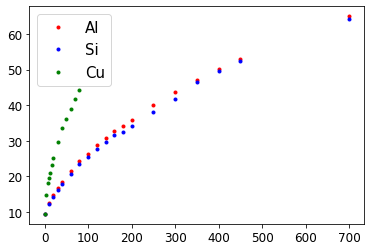

In [12]:
plt.plot(thick_gamma_al,e_min_gamma_al,"r.",label="Al")
plt.plot(thick_gamma,e_min_gamma,"b.",label="Si")
plt.plot(thick_gamma_cu,e_min_gamma_cu,"g.",label="Cu")
plt.legend()
plt.show()




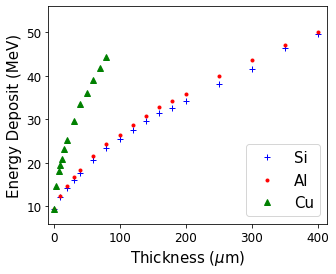

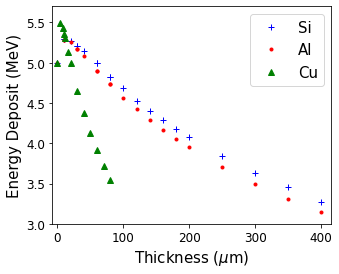

In [18]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
ax.plot(thick_gamma,e_min_gamma,"b+",label="Si")

ax.plot(thick_gamma_al,e_min_gamma_al,"r.",label="Al")
ax.plot(thick_gamma_cu,e_min_gamma_cu,"g^",label="Cu")
ax.set_xlabel("Thickness ($\mu$m)")
ax.set_ylabel("Energy Deposit (MeV)")
ax.set_xlim(-8,415)
ax.set_ylim(6,56)
ax.legend(loc="lower right")
# ax[0].show()
fig2,ax2=plt.subplots(1,1,figsize=(5,4))
ax2.plot(thick,e_min*0.5,"b+",label="Si")

ax2.plot(thick_al,e_min_al*0.5,"r.",label="Al")
ax2.plot(thick_cu,e_min_cu*0.5,"g^",label="Cu")
ax2.set_xlabel("Thickness ($\mu$m)")
ax2.set_ylabel("Energy Deposit (MeV)")
ax2.set_xlim(-8,415)
ax2.set_ylim(3.0,5.7)


ax2.legend()

# ax[1,0].plot(thick_al,e_min_gamma_al+e_min_al*0.5,"r.",label="Al")
# ax[1,0].plot(thick,e_min_gamma+e_min*0.5,"b.",label="Si")
# ax[1,0].plot(thick_cu,e_min_gamma_cu+e_min_cu*0.5,"g.",label="Cu")
# ax[1,0].legend()
# ax[0,0].set_xlim(0,20)

# ax[0,1].set_xlim(0,20)
plt.show()
fig.savefig("Material_thickness_gamma.png")
fig2.savefig("Material_thickness_elec.png")



In [14]:
all_ans_gamma=np.array([])
anew=e_min_gamma_cu[::-1]
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)
    all_ans_gamma=np.append(all_ans_gamma,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma))
print('next"')
all_ans=np.array([])
anew=e_min_cu[::-1]*0.5
print(anew)
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)

    all_ans=np.append(all_ans,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma),np.argmin(all_ans),np.min(all_ans))
all_ans_tot=all_ans_gamma/all_ans
print(all_ans_tot)
print(np.argmax(all_ans_tot),np.max(all_ans_tot))

0 44.27892303466797 41.73707580566406 2.5418472290039062
1 44.27892303466797 39.02463912963867 5.254283905029297
2 44.27892303466797 36.0723762512207 8.206546783447266
3 44.27892303466797 33.48252487182617 10.796398162841797
4 44.27892303466797 29.705718994140625 14.573204040527344
5 44.27892303466797 25.170822143554688 19.10810089111328
6 44.27892303466797 23.105642318725586 21.173280715942383
7 44.27892303466797 20.801719665527344 23.477203369140625
8 44.27892303466797 19.512426376342773 24.766496658325195
9 44.27892303466797 18.06557273864746 26.213350296020508
10 44.27892303466797 14.750079154968262 29.528843879699707
11 44.27892303466797 9.417659759521484 34.861263275146484
12 41.73707580566406 39.02463912963867 2.7124366760253906
13 41.73707580566406 36.0723762512207 5.664699554443359
14 41.73707580566406 33.48252487182617 8.25455093383789
15 41.73707580566406 29.705718994140625 12.031356811523438
16 41.73707580566406 25.170822143554688 16.566253662109375
17 41.73707580566406 23.

In [15]:
all_ans_gamma=np.array([])
anew=e_min_gamma[::-1]
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)
    all_ans_gamma=np.append(all_ans_gamma,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma))
print('next"')
all_ans=np.array([])
anew=e_min[::-1]*0.5
print(anew)
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)

    all_ans=np.append(all_ans,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma),np.argmin(all_ans),np.min(all_ans))
all_ans_tot=all_ans_gamma/all_ans
print(all_ans_tot)
print(np.argmax(all_ans_tot),np.max(all_ans_tot))

0 64.25731658935547 52.39196014404297 11.8653564453125
1 64.25731658935547 49.56501007080078 14.692306518554688
2 64.25731658935547 46.4576301574707 17.799686431884766
3 64.25731658935547 41.66472625732422 22.59259033203125
4 64.25731658935547 38.15972900390625 26.09758758544922
5 64.25731658935547 34.24820327758789 30.009113311767578
6 64.25731658935547 32.57210922241211 31.68520736694336
7 64.25731658935547 31.575510025024414 32.681806564331055
8 64.25731658935547 29.6319580078125 34.62535858154297
9 64.25731658935547 27.59726333618164 36.66005325317383
10 64.25731658935547 25.43024253845215 38.82707405090332
11 64.25731658935547 23.332483291625977 40.92483329772949
12 64.25731658935547 20.76028060913086 43.49703598022461
13 64.25731658935547 17.773202896118164 46.484113693237305
14 64.25731658935547 16.17573356628418 48.08158302307129
15 64.25731658935547 14.307385444641113 49.949931144714355
16 64.25731658935547 12.248479843139648 52.00883674621582
17 64.25731658935547 9.4176597595

ValueError: operands could not be broadcast together with shapes (171,) (253,) 

In [ ]:
all_ans_gamma=np.array([])
anew=e_min_gamma_al[::-1]
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)
    all_ans_gamma=np.append(all_ans_gamma,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma))
print('next"')
all_ans=np.array([])
anew=e_min_al[::-1]*0.5
print(anew)
combs=it.combinations(anew,2)
for j,comb in enumerate(combs):
    ans=abs(comb[0]-comb[1])
#     print(ans)
    print(j,comb[0],comb[1],ans)

    all_ans=np.append(all_ans,ans)
    
# print(np.argmax(all_ans_gamma),np.max(all_ans_gamma),np.argmin(all_ans),np.min(all_ans))
all_ans_tot=all_ans_gamma/all_ans
print(all_ans_tot)
print(np.argmax(all_ans_tot),np.max(all_ans_tot))

In [ ]:
print(thick_gamma_cu)


orig=e_min_gamma_cu
n1=np.concatenate([[-999],e_min_gamma_cu[:-1]])
n2=np.concatenate([[-999,-999],e_min_gamma_cu[:-2]])
n3=np.concatenate([[-999,-999,-999],e_min_gamma_cu[:-3]])
n4=np.concatenate([[-999,-999,-999,-999],e_min_gamma_cu[:-4]])
n5=np.concatenate([[-999,-999,-999,-999,-999],e_min_gamma_cu[:-5]])
n6=np.concatenate([[-999,-999,-999,-999,-999,-999],e_min_gamma_cu[:-6]])
n7=np.concatenate([[-999,-999,-999,-999,-999,-999,-999],e_min_gamma_cu[:-7]])
n8=np.concatenate([[-999,-999,-999,-999,-999,-999,-999,-999],e_min_gamma_cu[:-8]])
print(orig)

a=np.array([1,2,4,9])
b=np.array([-99,1,2,4])
c=np.array([-99,-99,1,2])
d=np.array([-99,-99,-99,1])

combs=it.combinations([a,b,c,d],2)
# combs=it.combinations([orig,n1,n2,n3,n4,n3,n4,n5,n6,n7,n8],2)

# print(n3)
for comb in combs:
    a1=comb[0]-comb[1]
#     a1[a1>1000]=0
    print(a1)

# Alex and Jo ignore the next bit

In [ ]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.00001peakStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.0001peakStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.001peakStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.01peakStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.1peakStepSize-Edep_v2.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-1.0peakStepSize-Edep_v2.root"

]


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

In [ ]:
plt.subplots(1,1,figsize=(15,7))
e_min=np.array([])
thick=np.array([])
zero=data_frame_dict[filenames_e[0]][0][:,540:740].mean(axis=1)[50:150].mean()
e_min=np.append(e_min,zero)
thick=np.append(thick,0)

for files in filenames_e:
 
    dic=data_frame_dict[files][0][:,540:740].mean(axis=1)
    dic=dic.reshape(int(len(dic)/6),6).mean(axis=1)
    histe=plt.plot(dic,label=files[63:-16]+"um")
#     e_min=np.append(e_min,dic[250:370].mean())
#     thick=np.append(thick,int(files[63:-16]))

#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [ ]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.00001airboxStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.0001airboxStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.001airboxStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.01airboxStepSize-Edep_v2.root",\
#             "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-0.1airboxStepSize-Edep_v2.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-400peakum-1.0airboxStepSize-Edep_v2.root"

]


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

In [ ]:
plt.subplots(1,1,figsize=(15,7))
e_min=np.array([])
thick=np.array([])
zero=data_frame_dict[filenames_e[0]][0][:,540:740].mean(axis=1)[50:150].mean()
e_min=np.append(e_min,zero)
thick=np.append(thick,0)

for files in filenames_e:
 
    dic=data_frame_dict[files][0][:,540:740].mean(axis=1)
    dic=dic.reshape(int(len(dic)/6),6).mean(axis=1)
    histe=plt.plot(dic,label=files[63:-16]+"um")
#     e_min=np.append(e_min,dic[250:370].mean())
#     thick=np.append(thick,int(files[63:-16]))

#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [ ]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-down-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-up-Edep.root"
]


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

In [ ]:
plt.subplots(1,1,figsize=(15,7))
e_min=np.array([])
thick=np.array([])
zero=data_frame_dict[filenames_e[0]][0][540:740,:].mean(axis=0)[50:150].mean()
e_min=np.append(e_min,zero)
thick=np.append(thick,0)

for files in filenames_e:
 
    dic=data_frame_dict[files][0][540:740,:].mean(axis=0)
    dic=dic.reshape(int(len(dic)/12),12).mean(axis=1)
    histe=plt.plot(dic,label=files[63:-16]+"um")
#     e_min=np.append(e_min,dic[250:370].mean())
#     thick=np.append(thick,int(files[63:-16]))

#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [ ]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-down-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-up-Silicon-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-down-Edep.root",\
            "/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Elec_Square_V3/Total-300peak1um_250peak2um_twopeaks-up-Edep.root"
]


data_frame_dict={}
for files in filenames_e:
    print(f"{files}   \n")
    data_frame_dict[files]=uproot.open(files)["histo"].numpy()

In [ ]:
plt.subplots(1,1,figsize=(15,7))
e_min=np.array([])
thick=np.array([])
zero=data_frame_dict[filenames_e[0]][0][540:740,:].mean(axis=0)[50:150].mean()
e_min=np.append(e_min,zero)
thick=np.append(thick,0)

for files in filenames_e:
 
    dic=data_frame_dict[files][0][540:740,:].mean(axis=0)
    dic=dic.reshape(int(len(dic)/1),1).mean(axis=1)
    histe=plt.plot(dic,label=files[83:-10])
#     e_min=np.append(e_min,dic[250:370].mean())
#     thick=np.append(thick,int(files[63:-16]))

#     print(f'{dic[10:160].mean():.4f} {dic[250:370].mean():.4f} {dic[50:150].mean()-dic[250:370].mean():.4f}')



# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()

In [ ]:
plt.subplots(1,1,figsize=(18,5))
# histy[0][400:601,:]
histy[0][490:511,:].mean(axis=0)
# plt.plot(histy[0][495:506,:].mean(axis=0),color='cyan')
plt.plot(histy[0][405:426,:].mean(axis=0),color='cyan')
plt.plot(histy[0][745:776,:].mean(axis=0),color='red')
# plt.plot(histy[0][95:106,:].mean(axis=0),color='red')

In [ ]:
plt.subplots(1,1,figsize=(16,5))

plt.plot(histy[0][:,:].mean(axis=1),color='red')
# plt.xlim(100,900)
plt.ylim(11.0,11.3)

In [ ]:
hist10x=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_10x10_Elec_Grating_X/Total-200files-Edep.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_y=hist10x[1][0]
plt.imshow(hist10x[0],extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]])

In [ ]:
    hist10y=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_10x10_Elec_Grating_Y/Total-200files-Edep.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_10y=hist10y[1][0]
plt.imshow(hist10y[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]])
plt.colorbar()

In [ ]:
hist10y_gamma=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Gamma_Grating_X_comptxsecbias100/Total-200files-Edep.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_10y_gamma=hist10y_gamma[1][0]
plt.imshow(hist10y_gamma[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]])
plt.colorbar()


In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,7)) # histy[0][400:601,:]

cam=Camera(fig)
for i in range(0,991,10):
    hist_temp=hist10y_gamma[0].copy()
#     print(i,i+10)
    hist_temp[:,i:i+10]=hist_temp[:,i:i+10]*0.75
    ax[0].imshow(hist_temp,extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]])
    ax[1].plot(hist10y_gamma[0][:,i:i+10].mean(axis=1),color='blue')
#     plt.show()
    cam.snap()
a=cam.animate()
a.save("/home/lb8075/linac/gratingfilm_10y_gamma.mp4")

In [ ]:
plt.subplots(1,1,figsize=(16,5))
# histy[0][400:601,:]
plt.plot(hist10y_gamma[0][:,450:550].mean(axis=1))
plt.plot(hist10y_gamma[0][:,50:150].mean(axis=1),color='red')

In [ ]:
hist10y_gamma=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Gamma_Grating_X_comptxsecbias100/Total-200files-Edep.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_10y=hist10y_gamma[1][0]
plt.imshow(hist10y_gamma[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]])
plt.colorbar()

In [ ]:
plt.subplots(1,1,figsize=(16,5))
# histy[0][400:601,:]
plt.plot(hist10y_gamma[0][:,450:550].mean(axis=1))
plt.plot(hist10y_gamma[0][:,50:150].mean(axis=1),color='red')
plt.xlim(200,800)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,7)) # histy[0][400:601,:]

cam=Camera(fig)
for i in range(0,991,10):
    hist_temp=hist10y_gamma[0].copy()
#     print(i,i+10)
    hist_temp[:,i:i+10]=hist_temp[:,i:i+10]*0.75
    ax[0].imshow(hist_temp,extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]])
    ax[1].plot(hist10y_gamma[0][:,i:i+10].mean(axis=1),color='blue')
#     plt.show()
    cam.snap()
a=cam.animate()
a.save("/home/lb8075/linac/gratingfilm_10y_gamma.mp4")

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(18,7))
# hist2=hist[0].copy()
# hist2[:]=0
xy=hist[1][0]
ax[0].imshow(hist[0],extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]],vmax=100)
ax[1].imshow(2.89*hist10y_gamma[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]],vmax=100)
ax[2].imshow(hist[0]+2.89*hist10y_gamma[0],extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]],vmax=100)
print((2.89*hist10y_gamma[0]).max())
# plt.colorbar()

In [ ]:
hist[0]

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,7)) # histy[0][400:601,:]

cam=Camera(fig)
for i in range(0,991,10):
    hist_temp=hist10y_gamma[0].copy()
#     print(i,i+10)
    hist_temp[:,i:i+10]=hist_temp[:,i:i+10]*0.75
    ax[0].imshow(hist_temp,extent=[xy[0][0],xy[0][-1],xy[1][0],xy[1][-1]],vmax=100)
    ax[1].plot(2.89*hist10y_gamma[0][:,i:i+10].mean(axis=1),color='red')
    ax[1].plot(hist[0][:,i:i+10].mean(axis=1),color='blue')
    ax[1].plot((hist[0]+2.89*hist10y_gamma[0])[:,i:i+10].mean(axis=1),color='green')
#     plt.show()
    cam.snap()
a=cam.animate()
a.save("/home/lb8075/linac/gratingfilm_10y_gamma.mp4")

In [ ]:
hist10x_gamma=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Gamma_Grating_Y_comptxsecbias100/Total-200files-Edep.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_10y=hist10x_gamma[1][0]
plt.imshow(hist10x_gamma[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]])
plt.colorbar()

print(hist10x_gamma[0].max())

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,7)) # histy[0][400:601,:]

cam=Camera(fig)
for i in range(0,991,10):
    hist_temp=hist10x_gamma[0].copy()
#     print(i,i+10)
    hist_temp[i:i+10,:]=hist_temp[i:i+10,:]*0.75
    ax[0].imshow(hist_temp,extent=[xy_y[0][0],xy_y[0][-1],xy_y[1][0],xy_y[1][-1]],vmax=26)
    ax[1].plot(2.89*hist10x_gamma[0][i:i+10,:].mean(axis=0),color='red')
    ax[1].plot(histy[0][i:i+10,:].mean(axis=0),color='blue')
    ax[1].plot((histy[0]+2.89*hist10x_gamma[0])[i:i+10,:].mean(axis=0),color='green')
#     plt.show()
    cam.snap()
a=cam.animate()
a.save("/home/lb8075/linac/gratingfilm_10x_gamma.mp4")

In [ ]:
hist10x_gamma=uproot.open("/work/lb8075/PhaseSpaces/PhS3BigSensor_40x40_Gamma_Grating_X_comptxsecbias100/Total-200files-Edep-400um.root")["histo"].numpy()
plt.subplots(1,1,figsize=(8,8))

xy_10y=hist10x_gamma[1][0]
plt.imshow(hist10x_gamma[0],extent=[xy_10y[0][0],xy_10y[0][-1],xy_10y[1][0],xy_10y[1][-1]])
plt.colorbar()

print(hist10x_gamma[0].max())

In [ ]:
plt.subplots(1,1,figsize=(16,5))
# histy[0][400:601,:]
plt.plot(hist10x_gamma[0][:,450:550].mean(axis=1))
plt.plot(hist10x_gamma[0][:,50:150].mean(axis=1),color='red')
plt.xlim(200,800)